In [1]:
import os

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import palettable
import multiprocessing
import joblib

import lhapdf
from mc2hessian import (LocalPDF, XGrid, Flavors, invcov_sqrtinvcov,
                        comp_hess, DEFAULT_EPSILON, make_grid, load_replica)

cm = palettable.colorbrewer.diverging.Spectral_11_r.mpl_colormap
plt.rcParams['figure.figsize'] = (16,9)
def imshow(data):
    plt.imshow(data, cmap=cm, vmin=np.percentile(data,20), vmax=np.percentile(data,80))

In [2]:
fl = Flavors()
xgrid = XGrid()
pdf = LocalPDF('1000rep', 1000, xgrid, fl, 1, eps=1e10)
index = pdf.fin
indextmp = np.copy(index)
nx = xgrid.n
nf = fl.n

# build covmat
cov = pdf.pdfcovmat()

 [Info] Keeping  350 nf*nx using (1-std/68cl) <= eps = 10000000000.0


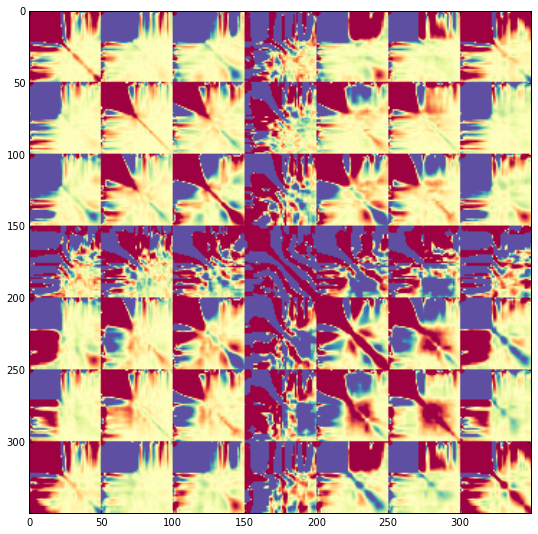

In [3]:
imshow(cov)

Eigenvalues smaller that 1e-7 are only numerical noise; atol is 1e-8

In [6]:
vals, vects = la.eigh(cov)
mask = vals>1e-7
vals = vals[mask]
vects = vects[:,mask]
np.allclose(np.dot(vects, np.dot(np.diag(vals), vects.T)), cov, atol=1e-8)

True

In [7]:
#minimask = vals>1e-4
Neig = 50
def compress_cov(Neig):

    minivals = vals[-Neig:]
    minivects = vects[:,-Neig:]
    minicov = np.dot(minivects, np.dot(np.diag(minivals), minivects.T))
    return minivals, minivects, minicov
#Neig = minivects.shape[1]

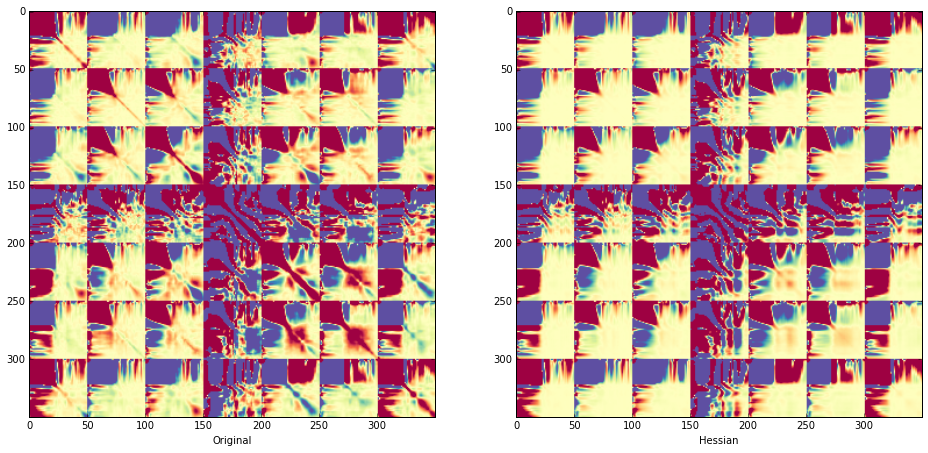

In [38]:
from IPython.html.widgets import interact
vmin=np.percentile(cov,20)
vmax=np.percentile(cov,80)
def inter(Neig):
    
    plt.subplot(1,2,1)
    plt.imshow(cov, vmin=vmin, vmax=vmax, cmap=cm)
    plt.xlabel("Original")
    plt.subplot(1,2,2)
    plt.imshow(compress_cov(Neig)[2], vmin=vmin, vmax=vmax, cmap=cm)
    plt.xlabel("Hessian")
    
    #plt.colorbar()
interact(inter, Neig=(5,100))

In [32]:
minivals, minivects, minicov = compress_cov(Neig)

Good number of eigenvectors

In [36]:
from IPython.display import display
def ratio(Neig):
    display("Ratio: %f" % (np.sum(vals[:-Neig])/np.sum(vals[-Neig:])))
interact(ratio,Neig=(0,50) )

'Ratio: 0.000065'